<a href="https://colab.research.google.com/github/craigalexander/DAS23/blob/main/Week_6_Lab_Multiple_linear_regression_in_Python_(Solutions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple linear regression

We have already introduced regression modelling where we modeled the relationship between an outcome variable $y$ and a single explanatory variable $x$. We only included one explanatory variable $x$, which was either a continuous or a categorical variable. Now, we shall examine fitting regression models with more than one explanatory variable. This is known as **multiple regression**.

When fitting regression models with multiple explanatory variables, the interpretation of an explanatory variable is made in association with the other variables. For example,  if we wanted to model income then we may consider an individual's level of education, and perhaps the wealth of their parents. Then, when interpreting the effect an individuals level of education has on their income, we would also be considering the effect of the wealth of their parents simultaneously, as these two variables are likely to be related.

We will be using the following Python libraries in this lab:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px

# Regression modelling with two continuous explanatory variables

Let's start by fitting a regression model with two continuous explanatory variables. We shall examine a data set that can be found in the `ISLR` package, which is an accompanying R package related to the textbook [An Introduction to Statistical Learning with Applications in R](http://www-bcf.usc.edu/~gareth/ISL/). We will take a look at the `Credit` data set, which consists of predictions made on the credit card balance of 400 individuals, where the predictions are based on information relating to income, credit limit and the level of education of an individual.

**Note**: This is a simulated data set and is not based on credit card balances of actual individuals.

The regression model we will be considering contains the following variables:

  * the continuous outcome variable $y$, the credit card balance of an individual; and
  * two explanatory variables $x_1$ and $x_2$, which are an individual's credit limit and income (both in thousands of dollars), respectively.

You can read in the data using the following code, or by downloading the csv file `credit.csv` from Moodle: 

In [61]:
url = 'https://github.com/craigalexander/DAS23/raw/main/Data/credit.csv'
credit = pd.read_csv(url,index_col=0)

Start by subsetting the `credit` data set so we only have the variables, `Balance`, `Limit` and `Income`. **NB** - it is best to give your new data set a different name than `credit` as not to overwrite the original

In [62]:
cred = credit[["Balance","Limit","Income"]]
print(cred)

     Balance  Limit   Income
ID                          
1        333   3606   14.891
2        903   6645  106.025
3        580   7075  104.593
4        964   9504  148.924
5        331   4897   55.882
..       ...    ...      ...
396      560   4100   12.096
397      480   3838   13.364
398      138   4171   57.872
399        0   2525   37.728
400      966   5524   18.701

[400 rows x 3 columns]


Again, we can obtain a summary of our data by using the `describe` function:

In [ ]:
print(cred.describe())

           Balance         Limit      Income
count   400.000000    400.000000  400.000000
mean    520.015000   4735.600000   45.218885
std     459.758877   2308.198848   35.244273
min       0.000000    855.000000   10.354000
25%      68.750000   3088.000000   21.007250
50%     459.500000   4622.500000   33.115500
75%     863.000000   5872.750000   57.470750
max    1999.000000  13913.000000  186.634000


**Question**

What is the mean credit limit?

**Answer**

$4735.60

**Question**

What percentage of credit card holders have an income greater than $57,471?

**Answer**
25%

Now that we are looking at the relationship between an outcome variable and multiple explanatory variables, we need to examine the correlation between each of them. We can examine the correlation between `Balance`, `Limit` and `Income` by creating a table of correlations as follows:

In [ ]:
print(cred.corr())

          Balance     Limit    Income
Balance  1.000000  0.861697  0.463656
Limit    0.861697  1.000000  0.792088
Income   0.463656  0.792088  1.000000


**Question**

What would be the verbal interpretaton of the correlation coefficient for the linear relationship between `Balance` and `Income`?

**Answer**

Weakly positive

From our correlation table we can see that the correlation between our two explanatory variables is 0.792, which is a strong positive linear relationship. Hence, we say there is a high degree of *collinearity* between our explanatory variables.

**Collinearity** (or **multicollinearity**) occurs when an explanatory variable within a multiple regression model can be linearly predicted from the other explanatory variables with a high level of accuracy. For example, in this case, since `Limit` and `Income` are highly correlated, we could take a good guess as to an individual's `Income` based on their `Limit`. That is, having one or more highly correlated explanatory variables within a multiple regression model essentially provides us with redundant information. Normally, we would remove one of the highly correlated explanatory variables, however, for the purpose of this example we shall ignore the potential issue of collinearity and carry on. 

Let's now produce scatterplots of the relationship between the outcome variable and the explanatory variables. First, we shall look at the scatterplot of `Balance` against `Limit`:

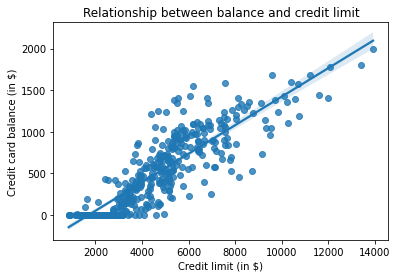

In [ ]:
sp=sns.regplot(data = cred, x = 'Limit', y = 'Balance', fit_reg = True)
sp.set(xlabel='Credit limit (in $)',ylabel='Credit card balance (in $)',title='Relationship between balance and credit limit')
plt.show()

**Question**

What is the relationship between balance and credit limit?

**Answer**

Positive

Now, let's look at a scatterplot of `Balance` and `Income`:

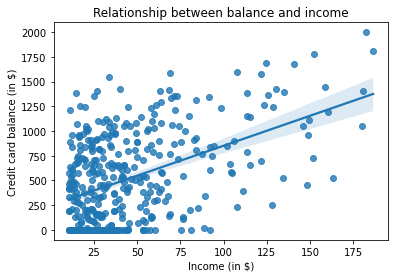

In [ ]:
sp=sns.regplot(data = cred, x = 'Income', y = 'Balance', fit_reg = True)
sp.set(xlabel='Income (in $)',ylabel='Credit card balance (in $)',title='Relationship between balance and income')
plt.show()

**Question**

What is the relationship between balance and income?

**Answer**

Positive

The two scatterplots above focus on the relationship between the outcome variable `Balance` and each of the explanatory variables independently. In order to get an idea of the relationship between all three variables we can use the `scatter_3d` function within the `plotly.express` library to plot an interactive 3-dimensional scatterplot as follows (note, you can rotate and move around the plot):

In [ ]:
fig = px.scatter_3d(cred, x='Income', y='Limit', z='Balance')
fig.show()

Is it reasonable to think about the points being randomly scattered around a two dimensional *plane*?

Before, when we fitted a regression model with one continuous explanatory variable, we were looking at the *best-fitting line*. However, now that we have more than one explanatory variable, we are looking at the *best-fitting plane*, which is a 3-dimensional generalisation of the best-fitting line.  

# Formal Analysis

The multiple regression model we will be fitting to the credit balance data is given as:

$$y_i = \alpha + \beta_1 x_{1i} + \beta_2 x_{2i} + \epsilon_i, ~~~~ \epsilon \sim N(0, \sigma^2),$$

where

  * $y_i$ is the credit balance of the $i^{th}$ individual;
  * $\alpha$ is the intercept and positions the best-fitting plane in 3D space;
  * $\beta_1$ is the coefficient for the first explanatory variable $x_1$;
  * $\beta_2$ is the coefficient for the second explanatory variable $x_2$; and
  * $\epsilon_i$ is the $i^{th}$ random error component.

Similarly to simple linear regression, we use the `OLS` function to fit the regression model:

In [ ]:
n = cred.shape[0]
X = np.stack((np.ones(n),cred['Limit'],cred['Income']),axis=1) # Creates the design matrix X by including column for intercept
y = cred['Balance']

model = sm.OLS(y,X)
result=model.fit()

print(result.summary(xname=['Intercept','Limit', 'Income']))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1342.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):          2.40e-177
Time:                        12:51:30   Log-Likelihood:                -2609.6
No. Observations:                 400   AIC:                             5225.
Df Residuals:                     397   BIC:                             5237.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -385.1793     19.465    -19.789      0.0

Note, within `print(result.summary(xname=['Intercept','Limit', 'Income']))`, we add in the `xname` argument to allocate names to our explanatory variables.

How do we interpret our model estimates defining the regression plane? They can be interpreted as follows:

  * The **intercept** represents the credit card balance (`Balance`) of an individual who has \$0 for both credit limit (`Limit`) and income (`Income`). However, this interpretation, though technically correct, is nonsensical in this context as there are no credit cards with \$0 credit limit and no people with an income of \$0 in the data set.  In contexts where the intercept term does not have a meaningful interpretation, we think of it as a value that positions the fitted model with no intuitive meaning.
  * The coefficient for credit limit (`Limit`) tells us that, *taking all other variables in the model into account and holding them constant*, there is an associated **increase**, on average, in credit card balance of \$0.26 for every \$1 increase in credit limit.
  * Similarly, the coefficient for income (`Income`) tells us that, *taking all other variables in the model into account and holding them constant*, there is an associated **decrease**, on average, in credit card balance of \$7.66 for every \$1 increase in income.

What do you notice that is strange about our coefficient estimates given our exploratory data analysis? 

Well, from our scatterplots of credit card balance against both credit limit and income, we saw that there appeared to be a positive linear relationship. Why do we then get a negative coefficient for income (-7.66)? This is due to a phenomenon known as **Simpson's Paradox**. This occurs when there are trends within different categories (or groups) of data, but that these trends disappear when the categories are grouped as a whole. For more details see [Section 7.3.2 of An Introduction to Statistical and Data Sciences in R](https://moderndive.com/7-multiple-regression.html#simpsonsparadox).


# Assessing model fit

Now we need to assess our model assumptions. As a reminder, our model assumptions are:

1. The deterministic part of the model captures all the non-random structure in the data, i.e. the residuals have mean zero.
2. The scale of the variability of the residuals is constant at all values of the explanatory variables.
3. The residuals are normally distributed.
4. The residuals are independent.
5. The values of the explanatory variables are recorded without error.

First, we need to obtain the fitted values and residuals from our regression model:

In [ ]:
print(result.fittedvalues)
print(result.resid)

We can assess our first two model assumptions by producing scatterplots of our residuals against each of our explanatory variables. First, let's begin with the scatterplot of the residuals against credit limit:

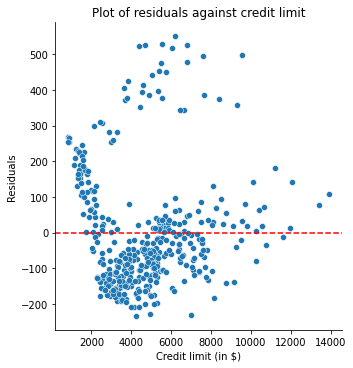

In [ ]:
sp=sns.relplot(x=cred['Limit'],y=result.resid)
sp.set(xlabel='Credit limit (in $)',ylabel='Residuals',title='Plot of residuals against credit limit')
plt.axhline(y=0,ls="--",color="red")
plt.show()

**Question**

Do the first two model assumptions appear to hold from the scatterplot of the residuals against credit limit?

**Answer**

No

Now, let's plot a scatterplot of the residuals against income:

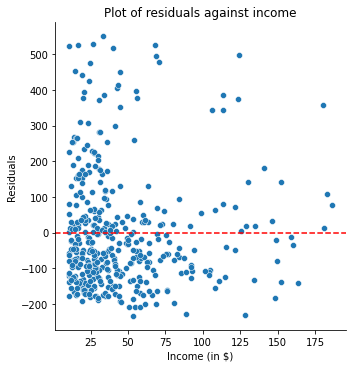

In [ ]:
sp=sns.relplot(x=cred['Income'],y=result.resid)
sp.set(xlabel='Income (in $)',ylabel='Residuals',title='Plot of residuals against income')
plt.axhline(y=0,ls="--",color="red")
plt.show()

Finally, we can check if the residuals are normally distributed by producing a histogram:

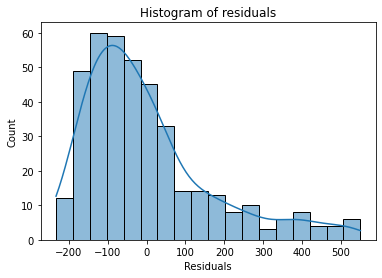

In [ ]:
sp=sns.histplot(x=result.resid,kde=True)
sp.set(xlabel='Residuals',title='Histogram of residuals')
plt.show()

**Question**

Do the residuals appear to be normally distribiuted and centred at zero?

**Answer**
No

# Regression modelling with one continuous and one categorical explanatory variable

Let's revisit the instructor evaluation data set `evals` we used for simple linear regression. You were tasked with examining the relationship between teaching score (`score`) and age (`age`). Now, let's also introduce the additional (binary) categorical explanatory variable gender (`gender`). That is, we will be examining:

  * the teaching score (`score`) as our outcome variable $y$;
  * age (`age`) as our continuous explanatory variable $x_1$; and
  * gender (`gender`) as our categorical explanatory variable $x_2$.

We can load the data in as follows:

In [2]:
evals_url = 'https://github.com/craigalexander/DAS23/raw/main/Data/evals.csv'
evals = pd.read_csv(evals_url,index_col=0) 

We will subset the `evals` dataset so we only have the variables `score`,`age` and `gender`.

In [3]:
evals_score = evals[["score","age","gender"]]

# We will need to convert gender to a category - BE SURE TO RUN THIS, EVEN IF READING IN LOCALLY!
evals_score['gender'] = evals_score.gender.astype('category')
evals_score.dtypes # Print data types

<ipython-input-3-aefaab095a55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evals_score['gender'] = evals_score.gender.astype('category')


score      float64
age          int64
gender    category
dtype: object

We can take a quick look at a summary of the data:

In [ ]:
evals_score.describe(include="all")

,score,age,gender
count,463.000000,463.000000,463
unique,NaN,NaN,2
top,NaN,NaN,male
freq,NaN,NaN,268
mean,4.174730,48.365011,NaN
std,0.543865,9.802742,NaN
min,2.300000,29.000000,NaN
25%,3.800000,42.000000,NaN
50%,4.300000,48.000000,NaN
75%,4.600000,57.000000,NaN


Now, let's compute the correlation coefficient between our outcome variable `score` and our continuous explanatory variable `age`:

In [ ]:
print(evals_score['score'].corr(evals_score['age']))

-0.10703197008755638


**Question**

What is the verbal interpretation of the correlation coefficient?

**Answer**

Very weak negative

We can now visualise our data by producing a scatterplot, where seeing as we have the categorical variable `gender`, we shall plot the points using different colours for each gender. we can use the `lmplot` command to carry this out, specifying the group using the `hue` command:

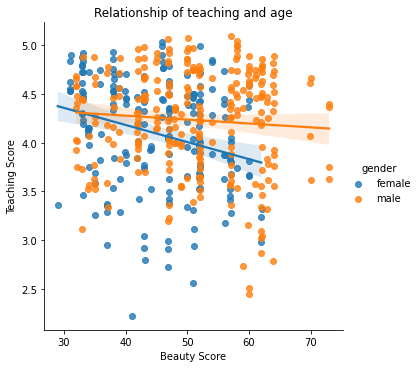

In [4]:
sp=sns.lmplot(data = evals_score, x = 'age', y = 'score', hue='gender' ,fit_reg = True,
           x_jitter = 0.1, y_jitter = 0.1)
sp.set(xlabel='Beauty Score',ylabel='Teaching Score',title='Relationship of teaching and age')
plt.show()

From the scatterplot we can see that:

  * There are very few women over the age of 60 in our data set.
  * From the plotted regression lines we can see that the lines have different slopes for men and women. That is, the associated effect of increasing age appears to be more severe for women than it does for men, i.e. the teaching score of women drops faster with age.

# Multiple regression: parallel slopes model

Here, we shall begin by fitting what is referred to as a parallel regression lines model. This model implies that the slope of relationship between teaching score (`score`) and age (`age`) is the same for both males and females, with only the intercept of the regression lines changing. Hence, our parallel regression lines model is given as:

\begin{align}
y_{i} &= \alpha + \beta_1 x_{1i} + \beta_2  x_{2i} + \epsilon_i \nonumber \\
&= \alpha + \beta_{\mbox{age}} \cdot \mbox{age}_i + \beta_{\mbox{male}} \cdot \mathbb{I}_{\mbox{male}}(i) + \epsilon_i, \nonumber
\end{align}

where

  * $\alpha$ is the intercept of the regression line for females;
  * $\beta_{\mbox{age}}$ is the slope of the regression line for both males and females;
  * $\mbox{age}_i$ is the age of the $i$th observation
  * $\beta_{\mbox{male}}$ is the additional term added to $\alpha$ to get the intercept of the regression line for males; and
  * $\mathbb{I}_{\mbox{male}}(i)$ is an indicator function such that
  
$$\mathbb{I}_{\mbox{male}}(i)=\left\{
\begin{array}{ll}
1 ~~~ \mbox{if the} ~ i \mbox{th observation is male},\\
0 ~~~ \mbox{Otherwise}.\\
\end{array}
\right.$$

We can fit the parallel regression lines model as follows (for this example, we will use the `formula.api` extension from `statsmodels` so we can write models the same style as in R - you can try use this syntax for the previous examples if you wish):


In [5]:
from statsmodels.formula.api import ols # Import formula writer to ease model fitting

model = ols("score~ age + gender",data=evals_score)
result=model.fit() # Fit model

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     9.338
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           0.000106
Time:                        13:42:34   Log-Likelihood:                -365.26
No. Observations:                 463   AIC:                             736.5
Df Residuals:                     460   BIC:                             748.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.4841      0.125     35.

Hence, the regression line for females is given by:

$$\widehat{\mbox{score}} = 4.48 - 0.009 \cdot \mbox{age},$$

while the regression line for males is given by:

$$\widehat{\mbox{score}} = 4.48 - 0.009 \cdot \mbox{age} + 0.191 = 4.671 - 0.009 \cdot \mbox{age}.$$


**Question**

From the parallel regression lines model, what would be the teaching score of a male instructor aged 52?

**Answer**

4.203

Now, let's superimpose our parallel regression lines onto the scatterplot of teaching score against age:

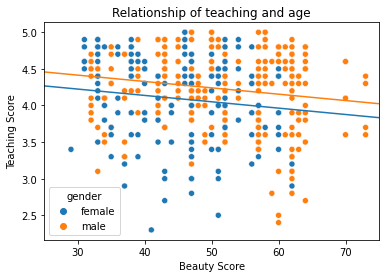

In [20]:
sl=result.params
sum= sl["Intercept"] + sl['gender[T.male]']
sp=sns.scatterplot(data = evals_score, x = 'age', y = 'score',hue='gender')
sp.set(xlabel='Beauty Score',ylabel='Teaching Score',title='Relationship of teaching and age')
plt.axline(xy1=(0,sl['Intercept']),slope=sl['age'],color="tab:blue")
plt.axline(xy1=(0,sum),slope=sl['age'],color="tab:orange")
plt.xlim(25, 75)
plt.show()

From the parallel regression lines model both males and females have the same slope, that is, the associated effect of age on teaching score is the same for both men and women. Hence, for every one year increase in age, there is an associated decrease in teaching score of 0.009. However, male instructors have a higher intercept term, that is, there is a vertical bump in the regression line for males in teaching scores. This is linked to the average difference in teaching scores that males obtain relative to females.

What is different between our previous scatterplot of teaching score against age  and the one we just created with our parallel lines superimposed?

In the original plot we have what is referred to as an interaction effect between age and gender. Hence, gender interacts in different ways for both males and females by age, and as such we should have different intercepts **and** slopes.

# Multiple regression: interaction model

There is an *interaction effect* if the associated effect of one variable depends on the value of another variable. For example, the effect of age here will depend on whether the instructor is male or female, that is, the effect of age on teaching scores will differ by gender. The interaction model can be written as:

\begin{align}
y_{i} &= \alpha + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{1i} \cdot x_{2i} + \epsilon_i \nonumber \\
&= \alpha + \beta_{\mbox{age}} \cdot \mbox{age}_i + \beta_{\mbox{male}} \cdot \mathbb{I}_{\mbox{male}}(i) + \beta_{\mbox{age, male}} \cdot \mbox{age}_i \cdot \mathbb{I}_{\mbox{male}}(i) + \epsilon_i, \nonumber
\end{align}

where $\beta_{\mbox{age, male}} \cdot \mbox{age}_i \cdot \mathbb{I}_{\mbox{male}}(i)$ corresponds to the interaction term.

In order to fit an interaction term within our regression model we replace the `+` sign with the `*` sign as follows:

In [21]:
model = ols("score~ age*gender",data=evals_score)
result=model.fit() # Fit model

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     8.288
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           2.23e-05
Time:                        13:56:47   Log-Likelihood:                -362.26
No. Observations:                 463   AIC:                             732.5
Df Residuals:                     459   BIC:                             749.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.8830      0

Hence, the regression line for females is given by:

$$\widehat{\mbox{score}} = 4.88 - 0.018 \cdot \mbox{age},$$
while the regression line for males is given by:

$$\widehat{\mbox{score}} = 4.88 - 0.018 \cdot \mbox{age} - 0.446 + 0.014 \cdot \mbox{age} = 4.434 - 0.004 \cdot \mbox{age}.$$

Notice how the interaction model allows for different slopes for females and males (-0.018 and -0.004, respectively).  These fitted lines correspond to the fitted lines we saw previously:

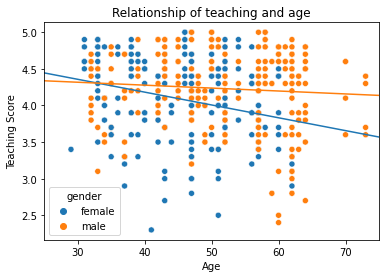

Intercept             4.882989
gender[T.male]       -0.446044
age                  -0.017523
age:gender[T.male]    0.013531
dtype: float64

In [26]:
sl=result.params
sum1= sl["Intercept"] + sl['gender[T.male]']
sum2 = sl['age'] + sl['age:gender[T.male]']
sp=sns.scatterplot(data = evals_score, x = 'age', y = 'score',hue='gender')
sp.set(xlabel='Age',ylabel='Teaching Score',title='Relationship of teaching and age')
plt.axline(xy1=(0,sl['Intercept']),slope=sl['age'],color="tab:blue")
plt.axline(xy1=(0,sum),slope=sum2,color="tab:orange")
plt.xlim(25, 75)
plt.show()
sl

**Question**

From the interaction model, what would be the teaching score of a male instructor aged 52?

**Answer**

4.226

How do they compare with the teaching score values from the parallel regression lines model?

Here, we can see that, although the intercept for male instructors may be lower, the associated average **decrease** in teaching score with every year increase in age (0.004) is not as severe as it is for female instructors (0.018).

# Assessing model fit

Now we have to assess the fit of the model by looking at plots of the residuals. We shall do this for the interaction model.

Let's start by looking at a scatterplot of the residuals against the explanatory variable by gender:

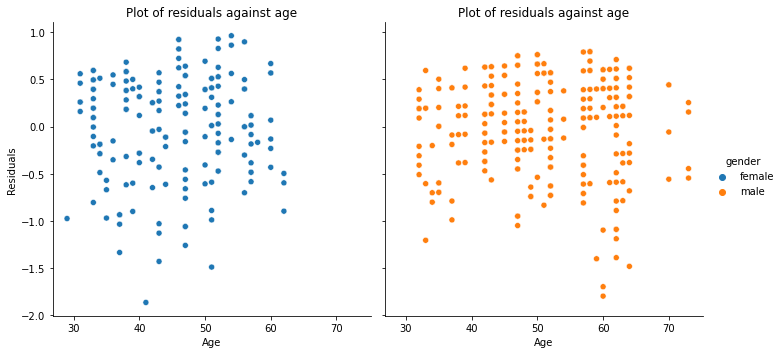

In [55]:
sp=sns.relplot(x=evals_score['age'],y=result.resid,hue=evals_score["gender"],
               col=evals_score['gender'],col_wrap=2)
sp.set(xlabel='Age',ylabel='Residuals',title='Plot of residuals against age')
plt.show()

Now we can plot the residuals against the fitted values

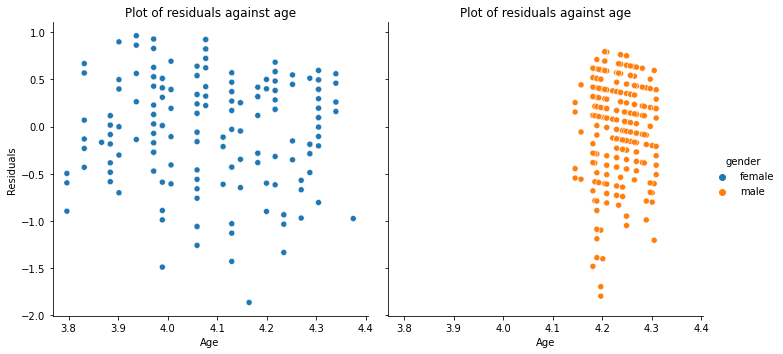

In [56]:
sp=sns.relplot(x=result.fittedvalues,y=result.resid,hue=evals_score["gender"],
               col=evals_score['gender'],col_wrap=2)
sp.set(xlabel='Age',ylabel='Residuals',title='Plot of residuals against age')
plt.show()




Finally, let's plot histograms of the residuals to assess whether they are normally distributed with mean zero:

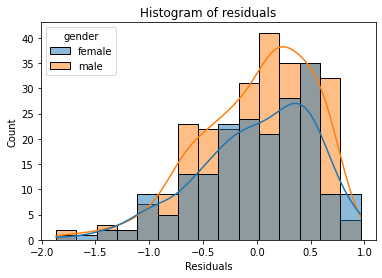

In [59]:
sp=sns.histplot(x=result.resid,kde=True,hue=evals_score["gender"])
sp.set(xlabel='Residuals',title='Histogram of residuals')
plt.show()

# Further task

Return to the `credit` data set and fit a multiple regression model with `Balance` as the outcome variable, and `Income` and `Age` as the explanatory variables. Assess the assumptions of the multiple regression model.

     Balance   Income  Age
ID                        
1        333   14.891   34
2        903  106.025   82
3        580  104.593   71
4        964  148.924   36
5        331   55.882   68
..       ...      ...  ...
396      560   12.096   32
397      480   13.364   65
398      138   57.872   67
399        0   37.728   44
400      966   18.701   64

[400 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     56.47
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           2.60e-22
Time:                        14:56:51   Log-Likelihood:                -2969.3
No. Observations:                 400   AIC:                             5945.
Df Residuals:                     397   BIC:                            

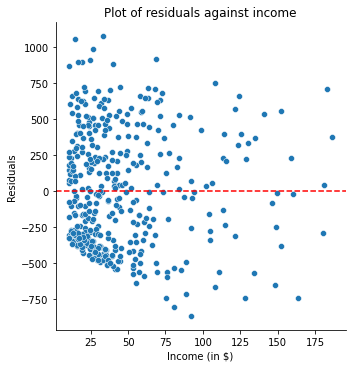

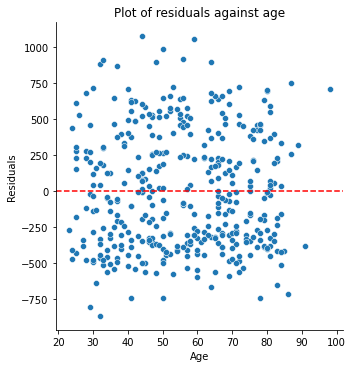

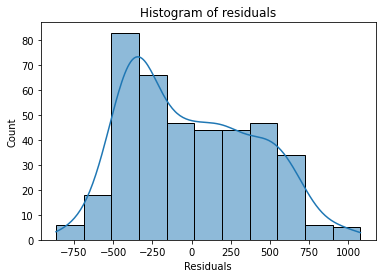

In [69]:
cred = credit[["Balance","Income","Age"]]
print(cred)

model = ols('Balance~Income+Age',data=cred)
result=model.fit()

print(result.summary())

sp=sns.relplot(x=cred['Income'],y=result.resid)
sp.set(xlabel='Income (in $)',ylabel='Residuals',title='Plot of residuals against income')
plt.axhline(y=0,ls="--",color="red")
plt.show()

sp=sns.relplot(x=cred['Age'],y=result.resid)
sp.set(xlabel='Age',ylabel='Residuals',title='Plot of residuals against age')
plt.axhline(y=0,ls="--",color="red")
plt.show()

sp=sns.histplot(x=result.resid,kde=True)
sp.set(xlabel='Residuals',title='Histogram of residuals')
plt.show()